In [1]:
import dill
import math
import numpy as np
from pprint import pprint
from bayes_opt import BayesianOptimization

CURRENT_YEAR = 2023
MAX_YEAR = 2123
years = list(range(CURRENT_YEAR, MAX_YEAR))
delays = {}

exec(open('utils.py').read())
print('Loaded')

Loaded


## Algorithms/insights delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 7         | -0.3691   | 2.602     | 6.515     | 9.907     |
| 9         | -0.3332   | 1.178     | 4.594     | 1.48      |
| 10        | -0.3264   | 3.396     | 2.634     | 0.1431    |
| 12        | -0.06801  | 0.815     | 8.08      | 0.2894    |
| 47        | -0.04197  | 0.7902    | 8.22      | 0.2628    |
| 52        | -0.02731  | 0.5962    | 8.081     | 0.2725    |
Curve params found
{'push': 0.5962238568985794,
 'shift': 8.080910235135153,
 'slope': 0.2724877608431026}
-
## Chance of nonscaling delay ##


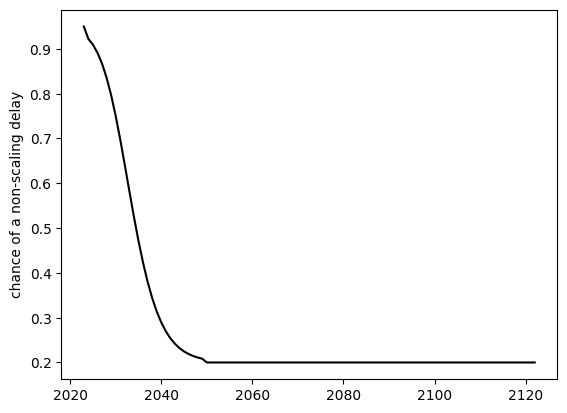

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 92%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 91%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 89%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 87%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 84%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 80%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 75%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 70%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 64%
Year: 2033

In [2]:
nonscaling_points = [(2023, 0.95),
                     (2027, 0.9),
                     (2030, 0.7),
                     (2035, 0.5),
                     (2050, 0.2)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['algorithms'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(3, 30)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)

## Data delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.408    | 6.686     | 9.608     | 2.629     |
| 4         | -0.357    | 1.156     | 1.363     | 5.609     |
| 5         | -0.3371   | 2.076     | 6.168     | 6.091     |
| 13        | -0.06164  | 0.03177   | 7.305     | 1.236     |
| 45        | -0.04016  | 0.01      | 6.924     | 1.423     |
| 50        | -0.0217   | 0.01      | 5.842     | 1.211     |
| 96        | -0.01373  | 0.01921   | 6.043     | 1.092     |
Curve params found
{'push': 0.01921497992770283,
 'shift': 6.043442189260387,
 'slope': 1.091840658070734}
-
## Chance of nonscaling delay ##


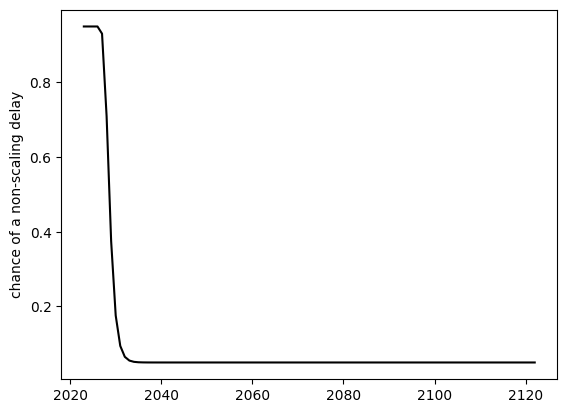

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 93%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 71%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 37%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 18%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 9%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 7%
Year: 2033 -

In [3]:
nonscaling_points = [(2023, 0.95),
                     (2027, 0.9),
                     (2030, 0.2),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['data'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(1, 10)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)

## Robotics need delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.08083  | 7.874     | 6.833     | 8.238     |
| 3         | -0.05768  | 4.102     | 9.0       | 0.4456    |
| 4         | -0.01803  | 0.53      | 7.83      | 9.182     |
| 14        | -0.01678  | 0.2838    | 5.463     | 7.559     |
| 41        | -0.01667  | 0.01      | 5.234     | 10.0      |
| 43        | -0.01667  | 0.01      | 10.0      | 4.405     |
| 53        | -0.01667  | 0.01      | 4.029     | 3.78      |
| 56        | -0.01667  | 0.01      | 2.779     | 2.629     |
| 76        | -0.01666  | 0.01      | 1.631     | 2.196     |
| 102       | -0.01664  | 0.01      | 3.456     | 1.971     |
Curve params found
{'push': 0.01, 'shift': 3.4559063283824405, 'slope': 1.9713885168920682}
-
## Chance of nonscaling delay ##


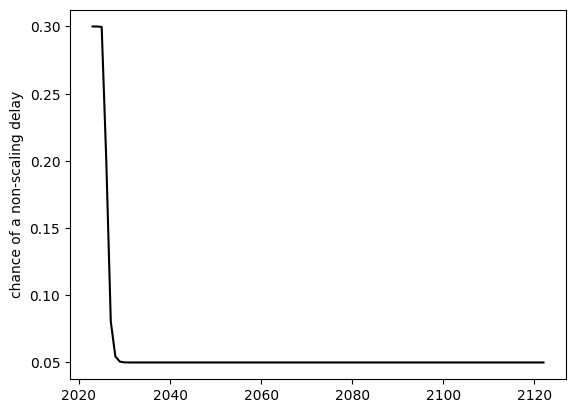

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 8%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2033 - cha

In [4]:
nonscaling_points = [(2023, 0.3),
                     (2030, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['robotics'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(1, 5)],
                                                                        [0.1, sq.lognorm(5, 10)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)

##  Real world feedback delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 5         | -0.03795  | 2.152     | 5.267     | 1.201     |
| 6         | -0.03426  | 1.512     | 3.851     | 5.199     |
| 7         | -0.03391  | 1.49      | 3.886     | 1.595     |
| 16        | -0.03066  | 1.156     | 3.359     | 6.796     |
| 18        | -0.02061  | 0.9134    | 9.169     | 6.202     |
| 23        | -0.01698  | 0.4567    | 9.131     | 8.51      |
| 41        | -0.01667  | 0.01      | 6.55      | 10.0      |
| 43        | -0.01667  | 0.01      | 5.433     | 4.445     |
| 46        | -0.01667  | 0.01      | 8.427     | 4.495     |
| 47        | -0.01667  | 0.01      | 5.318     | 2.378     |
| 63        | -0.01666  | 0.01      | 3.771     | 2.251     |
Curve params found
{'push': 0.01, 'shift': 3.7709927650222985, 'slope': 2.250979870418748}
-
## Chance of nonscaling delay ##


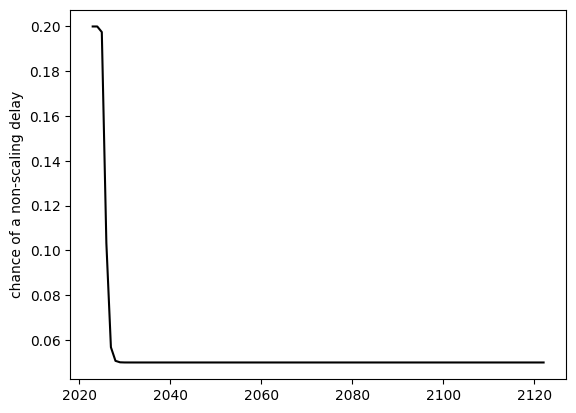

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 6%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2033 - cha

In [5]:
nonscaling_points = [(2023, 0.2),
                     (2030, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['real_world_feedback'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.6, sq.lognorm(1, 5)],
                                                                                   [0.3, sq.lognorm(5, 10)],
                                                                                   [0.1, sq.lognorm(10, 30)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)

## Policy delay (e.g., pause)

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.08841  | 8.663     | 4.23      | 3.215     |
| 3         | -0.03333  | 0.1484    | 9.496     | 9.049     |
| 41        | -0.03333  | 0.01      | 5.317     | 9.898     |
| 43        | -0.03333  | 0.01      | 5.997     | 4.354     |
| 57        | -0.03333  | 0.01      | 4.768     | 3.431     |
| 61        | -0.03333  | 0.01      | 5.94      | 3.016     |
| 113       | -0.03333  | 0.01      | 5.168     | 2.769     |
Curve params found
{'push': 0.01, 'shift': 5.167887376891306, 'slope': 2.7689725903763587}
-
## Chance of nonscaling delay ##


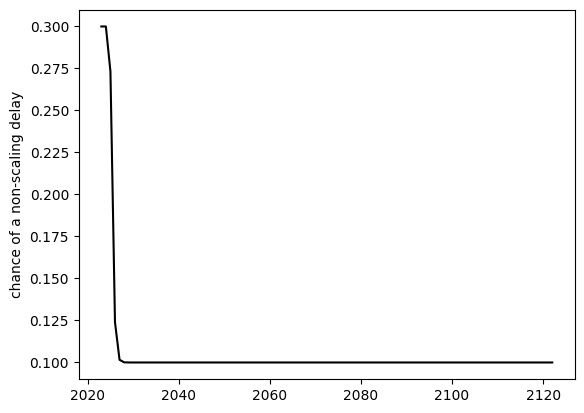

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 27%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 12%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2033

In [7]:
nonscaling_points = [(2023, 0.3),
                     (2030, 0.2),
                     (2050, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['policy_pause'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(1, 5)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)

## Save

In [9]:
with open('caches/nonscaling_delays.dill', 'wb') as f:
    dill.dump(delays, f)
    
print('cached!')

cached!
